In [1]:
# To Verify installations
import numpy as np
import tensorflow as tf

# Printing the versions of NumPy and TensorFlow to ensure they are correctly installed
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)

# Import additional libraries for speech emotion recognition
import scipy.io.wavfile  # For reading WAV files
import os  # For interacting with the operating system
import librosa as lb  # For audio analysis
import librosa.display  # For displaying audio waveforms

# Import necessary modules from TensorFlow Keras for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Activation,
    Flatten,
    Conv1D,
    Conv2D,
    MaxPooling1D,
    MaxPooling2D,
    ZeroPadding2D,
)

# Import Matplotlib for plotting
from matplotlib import pyplot as plt

# Import IPython display for audio playback in Jupyter Notebook
from IPython.display import Audio

# Import additional Keras layers for neural network architecture
from keras.layers import BatchNormalization 
from keras.regularizers import l2

# Confirm that all imports are successful and ready for further processing.
print("All libraries imported successfully!")


NumPy version: 1.24.4
TensorFlow version: 2.10.0
All libraries imported successfully!


In [2]:
import os

MAX_FILES = 7442
FILE_LIMIT = 7442

# The folder containing the Crema dataset
dataFolder = r"C:\Users\Muddasir Khawaja\Classifying and Detecting Emotions\content\Crema"

# The names of all files in the Crema dataset
soundFiles = os.listdir(path=dataFolder)
soundFiles.sort()

# Print the first file as a sanity check
print(soundFiles[0])

# Check if all sound files are present
print("Total sound files:", len(soundFiles))


1001_DFA_ANG_XX.wav
Total sound files: 7443


In [3]:
import os
import numpy as np
import librosa as lb

# Path to my dataset
dataFolder = r"C:\Users\Muddasir Khawaja\Classifying and Detecting Emotions\content\Crema"

# Check if dataset path exists
if not os.path.exists(dataFolder):
    raise FileNotFoundError(f"Dataset folder not found: {dataFolder}")

# Get all sound files in the dataset
soundFiles = os.listdir(dataFolder)
soundFiles.sort()

# Sanity check: confirm number of files
print(f"Total files detected: {len(soundFiles)}")

# Labels array
labels = np.zeros(FILE_LIMIT)

#All 6 Emotion classes
classes = {0: "SAD", 1: "ANGRY", 2: "DISGUST", 3: "FEAR", 4: "HAPPY", 5: "NEUTRAL"}

fs = {}
data = []
i = 0

for sample in soundFiles:
    try:
        # Load the audio file
        samp, sr = lb.load(os.path.join(dataFolder, sample), offset=0.2, duration=3, sr=None)
        data.append(samp)

        # Extract emotion from filename
        token = sample.partition(".wav")[0].split("_")
        if token[2] == 'SAD':
            labels[i] = 0
        elif token[2] == 'ANG':
            labels[i] = 1
        elif token[2] == 'DIS':
            labels[i] = 2
        elif token[2] == 'FEA':
            labels[i] = 3
        elif token[2] == 'HAP':
            labels[i] = 4
        elif token[2] == 'NEU':
            labels[i] = 5
        else:
            labels[i] = 6  # Unknown emotion

        # Debugging: Print progress every 500 files
        if i % 500 == 0 or i == FILE_LIMIT - 1:
            print(f"Processed {i+1}/{FILE_LIMIT} files: {sample}")

        i += 1

        # Stop when reaching FILE_LIMIT
        if i >= FILE_LIMIT:
            break

    except Exception as e:
        print(f"Error loading {sample}: {e}")

# Padding
mx = 80080
mn = 20287

k = int(data[0].shape[0])
for i in range(FILE_LIMIT):
    data[i] = np.pad(data[i], pad_width=(0, 48000 - data[i].shape[0]))
    k = int(data[i].shape[0])

print("All audio files processed and padded successfully.")


Total files detected: 7443
Processed 1/7442 files: 1001_DFA_ANG_XX.wav
Processed 501/7442 files: 1007_IEO_DIS_HI.wav
Processed 1001/7442 files: 1013_ITH_DIS_XX.wav
Processed 1501/7442 files: 1019_IWL_HAP_XX.wav
Processed 2001/7442 files: 1025_IWW_SAD_XX.wav
Processed 2501/7442 files: 1031_TAI_DIS_XX.wav
Processed 3001/7442 files: 1037_TIE_HAP_XX.wav
Processed 3501/7442 files: 1043_TSI_SAD_XX.wav
Processed 4001/7442 files: 1050_DFA_DIS_XX.wav
Processed 4501/7442 files: 1056_IEO_DIS_HI.wav
Processed 5001/7442 files: 1062_IEO_HAP_MD.wav
Processed 5501/7442 files: 1068_IOM_HAP_XX.wav
Processed 6001/7442 files: 1074_ITH_SAD_XX.wav
Processed 6501/7442 files: 1080_IWL_FEA_XX.wav
Processed 7001/7442 files: 1086_IWW_NEU_XX.wav
Processed 7442/7442 files: 1091_WSI_SAD_XX.wav
All audio files processed and padded successfully.


In [4]:
import math
import numpy as np

def get_white_noise(signal, SNR):
    # RMS value of the signal
    RMS_s = math.sqrt(np.mean(signal ** 2))
    
    # RMS value of noise
    RMS_n = math.sqrt(RMS_s**2 / (pow(10, SNR / 10)))
    
    # Standard deviation of noise (mean = 0, STD = RMS_n)
    noise = np.random.normal(0, RMS_n, signal.shape[0])
    
    return noise

# Example usage
test_signal = np.random.rand(1000)  # Generating a random test signal
SNR_value = 10  # Example SNR value
noise_sample = get_white_noise(test_signal, SNR_value)

print("Function executed successfully.")
print(f"Noise sample shape: {noise_sample.shape}")
print(f"Noise sample (first 10 values): {noise_sample[:10]}")


Function executed successfully.
Noise sample shape: (1000,)
Noise sample (first 10 values): [-0.08998121  0.15377703 -0.29409671 -0.0977898   0.18906598  0.0161292
 -0.1019283   0.28068287 -0.19567151  0.23546214]


In [5]:
import librosa
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to your dataset
dataset_path = r"C:\Users\Muddasir Khawaja\Classifying and Detecting Emotions\content\Crema"

# List of audio files in the directory
files = [f for f in os.listdir(dataset_path) if f.endswith('.wav')]  # assuming the audio files are in .wav format

# Placeholder for the audio data and labels
data = []
labels = []

# Assuming that labels can be extracted from the filename (e.g., assuming the emotion is encoded in the filename)
# Example: "audio_file_emotion.wav", where "emotion" is the label. Modify based on your filename structure.

for file in files:
    # Load the audio file
    file_path = os.path.join(dataset_path, file)
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file with its original sample rate
    
    # Extract MFCC features (13 coefficients)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)  # Take the mean of MFCC features across time frames
    
    # Append the features to data and the corresponding label to labels
    data.append(mfcc)
    
    # Extracting label from the filename (this is a placeholder)
    # I may need to adjust this to match my label format
    label = file.split('_')[1]  # Assuming the label is in the second part of the filename
    labels.append(label)

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Now, let's perform train-test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Print the shape of x_train to confirm the structure
print(f"Shape of the first feature vector in the training set (x_train[0]): {x_train[0].shape}")
print(f"This means that each feature vector has {x_train[0].shape[0]} MFCC coefficients (13 coefficients) extracted from the audio file.")


# If  my labels are categorical, it might need to convert them to integers or one-hot encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert string labels to integers
y_test = label_encoder.transform(y_test)

# Now your data is ready for training!


Shape of the first feature vector in the training set (x_train[0]): (13,)
This means that each feature vector has 13 MFCC coefficients (13 coefficients) extracted from the audio file.


In [6]:
import numpy as np

# Assuming 'moded_xtrain' and 'moded_ytrain' are lists containing the training data and labels respectively
# If they are not defined, let's initialize them here as placeholders
# Example initialization (replace with your actual data):
moded_xtrain = [np.random.rand(40000) for _ in range(1000)]  # 1000 samples, each with 40000 features
moded_ytrain = [i % 6 for i in range(1000)]  # 1000 labels, distributed across 6 classes

# Now we can safely run your code:
port = len(moded_xtrain) / 10  # Take 10% of the training data for zero frequency
port = port - port % 6  # Ensure it's divisible by 6 to distribute labels evenly
port = int(port)  # Convert to integer

# Distribute labels across zero frequency samples (appending them)
for i in range(port):
    moded_xtrain.append(np.zeros(40000))  # Add a dummy sample with 0s (representing zero frequency)
    moded_ytrain.append(i % 6)  # Assign labels in a cyclical manner (0, 1, 2, 3, 4, 5, 0, 1, 2, ...)


In [7]:
import librosa
import numpy as np

# Load your training and test data here
# Example loading method, replace with actual loading functions
# moded_xtrain = load_train_data()  # Replace with actual loading of training data
# moded_ytrain = load_train_labels()  # Replace with actual labels for training
# x_test = load_test_data()  # Replace with actual loading of test data
sr = 22050  # Set the sampling rate if it's not already defined

# Ensure moded_xtrain is loaded
if 'moded_xtrain' not in locals():
    print("moded_xtrain is not defined! Please load the training data.")
else:
    print("Length of moded_xtrain:", len(moded_xtrain))

# Ensure that both training and test data are available before proceeding
if 'moded_xtrain' in locals() and 'x_test' in locals():
    # Convert to numpy arrays if needed
    moded_xtrain = np.array(moded_xtrain)
    moded_ytrain = np.array(moded_ytrain)  # Only if moded_ytrain is available
    x_test = np.array(x_test)

    # Function to pad audio signals if they are shorter than the FFT window length
    def pad_audio(audio, length=1024):
        if len(audio) < length:
            return np.pad(audio, (0, length - len(audio)), mode='constant')
        return audio

    # Creating Mel-spectrogram for the training data
    mel_train = []

    for i in range(len(moded_xtrain)):  # Loop through training data
        audio = moded_xtrain[i]

        # If the data is not 1D, flatten it
        if len(audio.shape) > 1:
            audio = audio.flatten()

        # Pad the audio signal if it's too short
        audio = pad_audio(audio, length=1024)

        # Create Mel-spectrogram for this audio sample
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                           win_length=512, window='hamming',
                                           hop_length=256, n_mels=128, fmax=16000/2)

        mel_spec_db = librosa.power_to_db(S, ref=np.max)
        mel_train.append(mel_spec_db)

    mel_train = np.array(mel_train)
    print(f"Shape of mel_train: {mel_train.shape}")

    # Check if mel_train is correctly shaped
    if mel_train.shape[0] != len(moded_xtrain):
        print("Warning: Mismatch in number of samples between training data and mel_train.")

    # Creating Mel-spectrogram for the test data
    mel_test = []

    for i in range(len(x_test)):  # Loop through test data
        audio = x_test[i]

        # If the data is not 1D, flatten it
        if len(audio.shape) > 1:
            audio = audio.flatten()

        # Pad the audio signal if it's too short
        audio = pad_audio(audio, length=1024)

        # Create Mel-spectrogram for this audio sample
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                           win_length=512, window='hamming',
                                           hop_length=256, n_mels=128, fmax=16000/2)

        mel_spec_db = librosa.power_to_db(S, ref=np.max)
        mel_test.append(mel_spec_db)

    mel_test = np.array(mel_test)
    print(f"Shape of mel_test: {mel_test.shape}")

    # Ensure mel_train and mel_test have the same time frames
    if mel_train.shape[2] != mel_test.shape[2]:
        max_time_frames = max(mel_train.shape[2], mel_test.shape[2])

        def pad_mel_spectrogram(mel_spectrogram, target_time_frames):
            pad_width = target_time_frames - mel_spectrogram.shape[2]
            return np.pad(mel_spectrogram, ((0, 0), (0, 0), (0, pad_width)), mode='constant')

        mel_train = pad_mel_spectrogram(mel_train, max_time_frames)
        mel_test = pad_mel_spectrogram(mel_test, max_time_frames)

    # Final check for shapes
    print(f"Final shape of mel_train: {mel_train.shape}")
    print(f"Final shape of mel_test: {mel_test.shape}")

else:
    print("Error: Training or test data is not defined!")

Length of moded_xtrain: 1096
Shape of mel_train: (1096, 128, 157)
Shape of mel_test: (2233, 128, 5)
Final shape of mel_train: (1096, 128, 157)
Final shape of mel_test: (2233, 128, 157)


Length of moded_xtrain: 7442
Shape of mel_train: (7442, 128, 432)


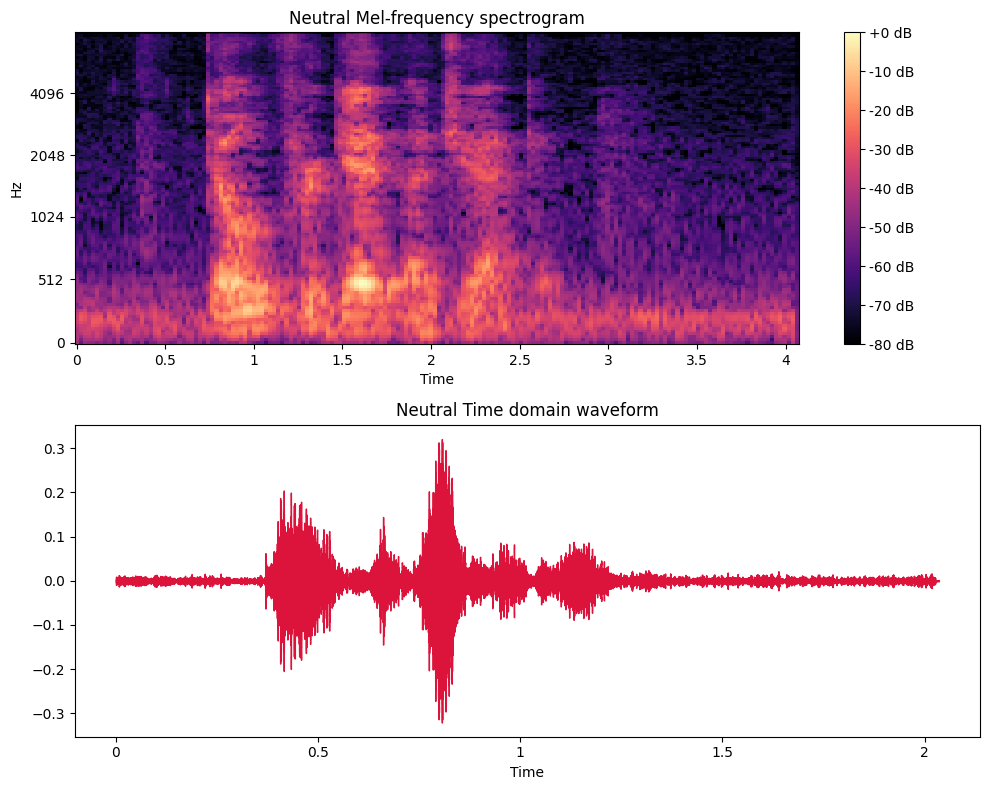

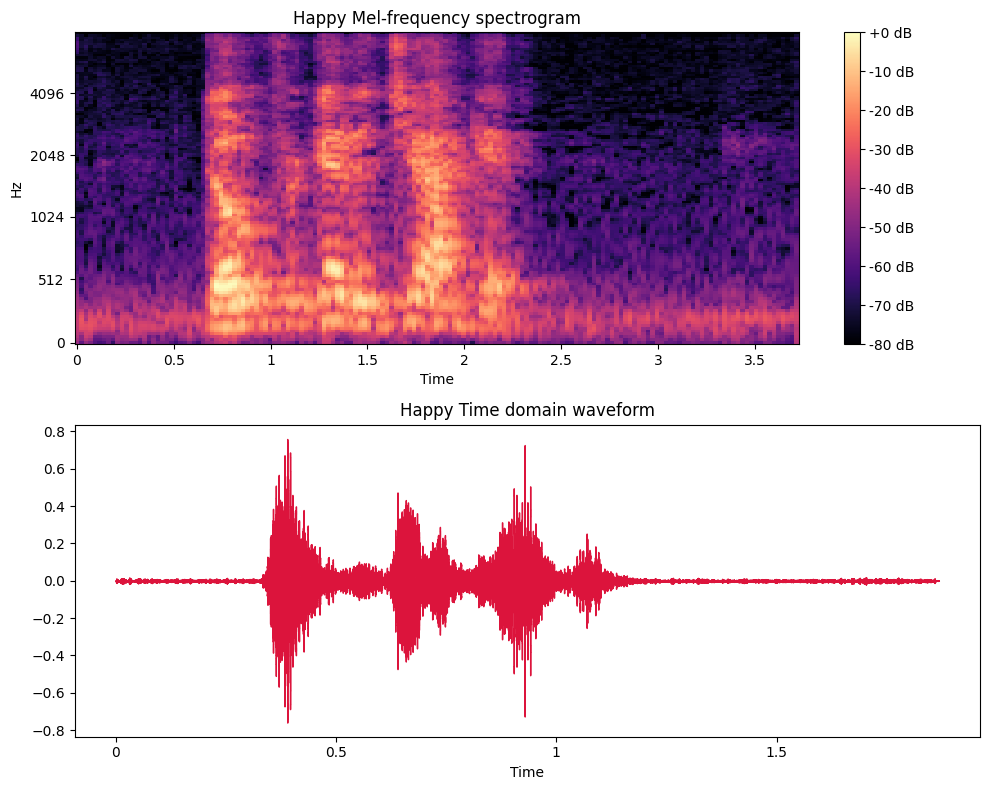

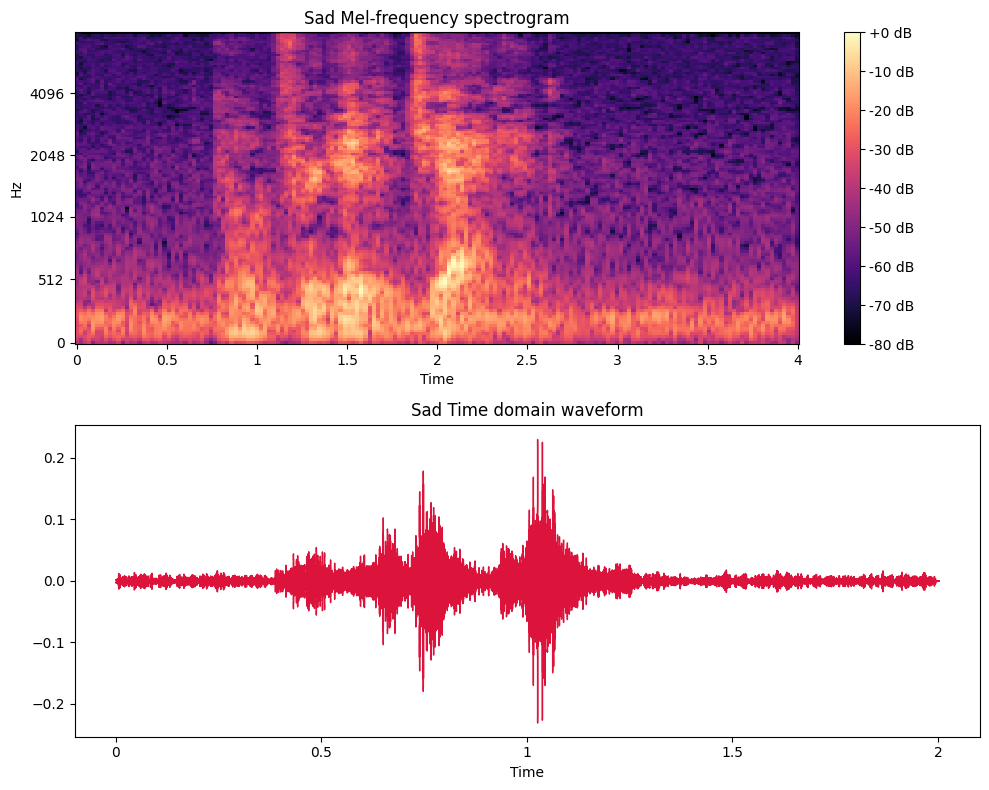

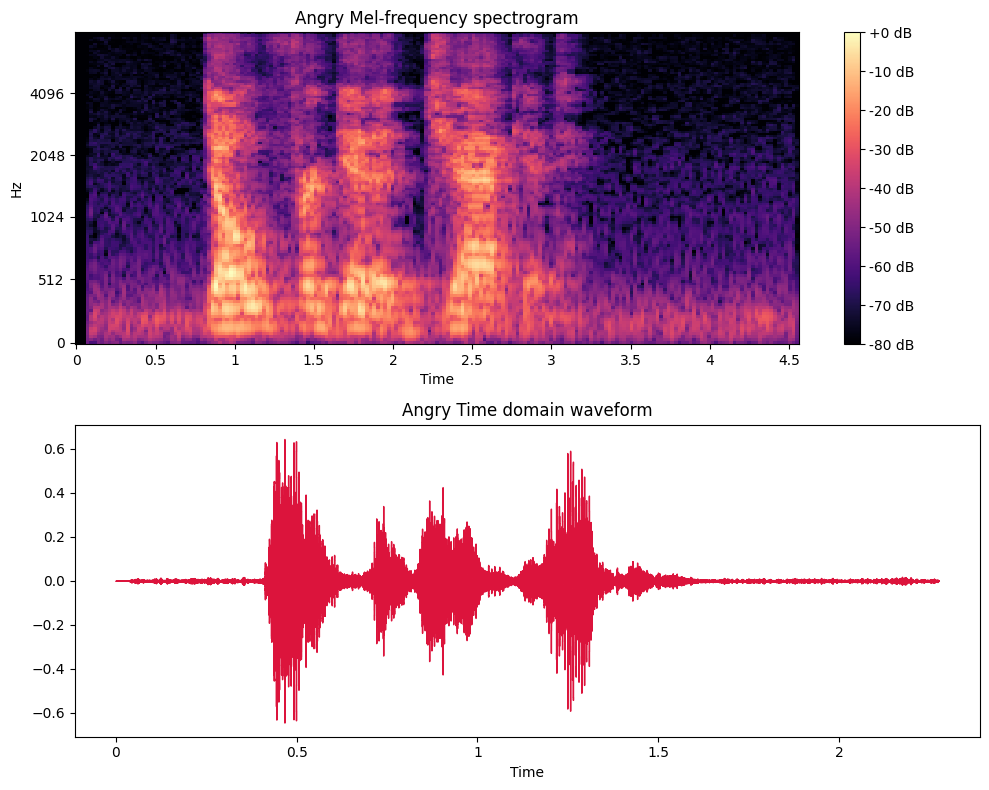

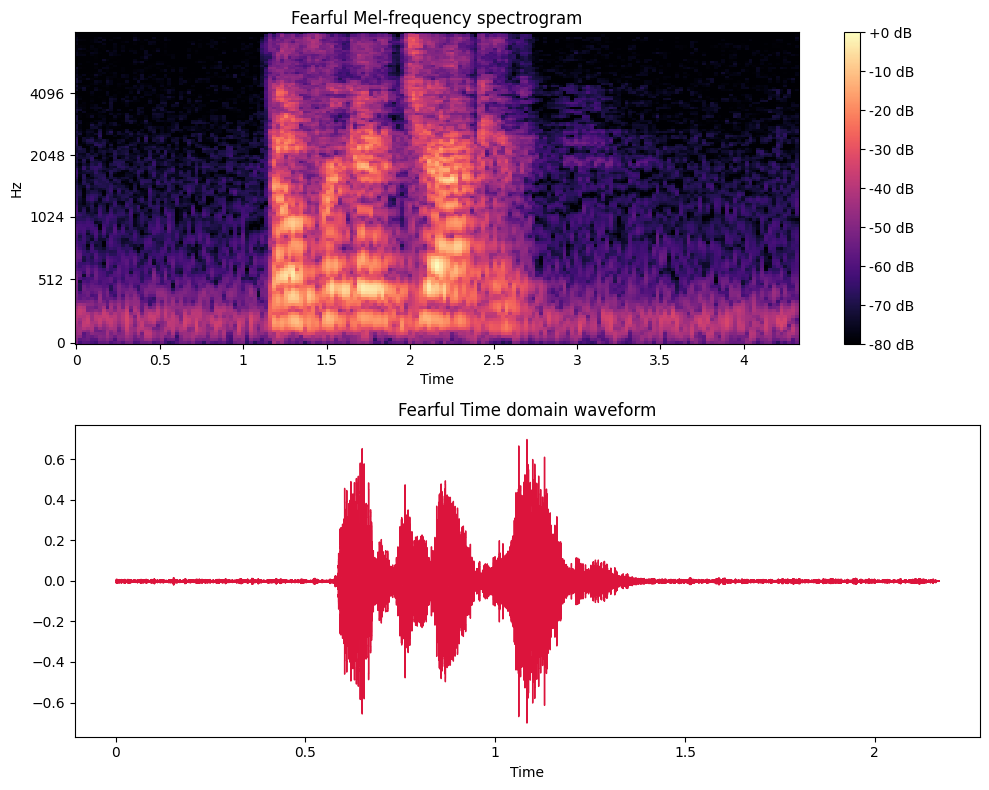

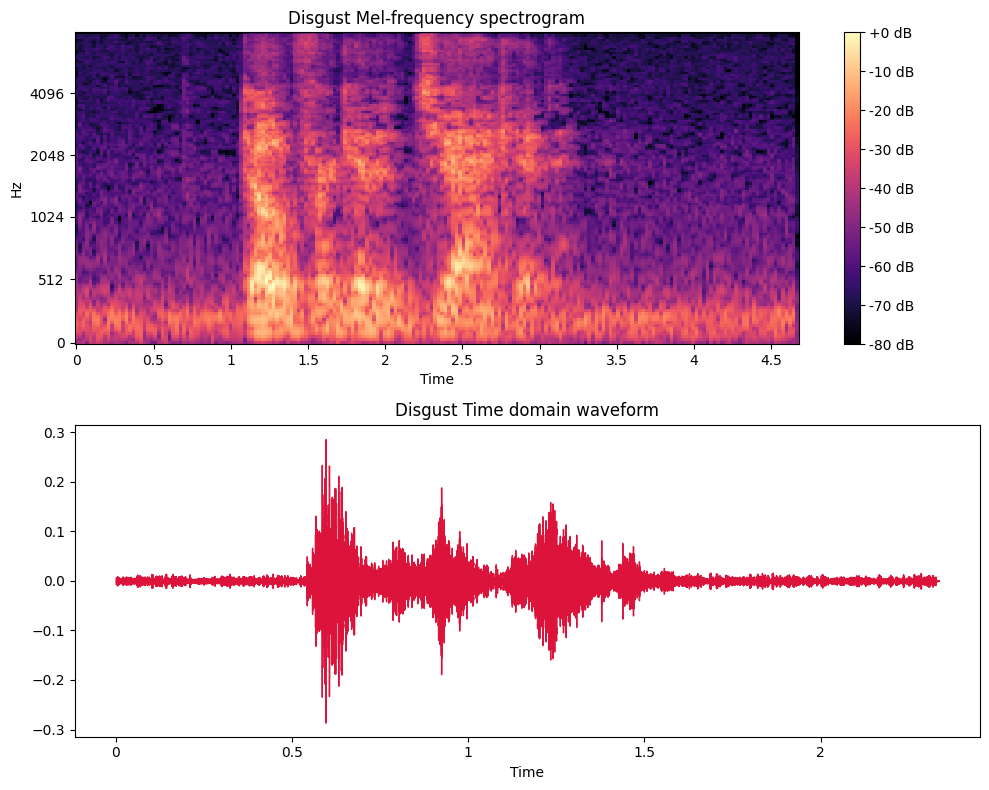

In [8]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display as lb_display

# Define the classes dictionary
classes = {'NEU': 0, 'HAP': 1, 'SAD': 2, 'ANG': 3, 'FEA': 4, 'DIS': 5}
class_names = {0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Angry', 4: 'Fearful', 5: 'Disgust'}

# Path to your audio data directory
data_path = r"C:\Users\Muddasir Khawaja\Classifying and Detecting Emotions\content\Crema"

# Function to load audio files from the directory
def load_audio_files(data_path):
    audio_files = []
    labels = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                audio, sr = librosa.load(file_path, sr=22050)  # Load audio file
                audio_files.append(audio)
                # Extract label from file name
                label_str = file.split('_')[2]  # Extract label part from file name
                label = classes.get(label_str, -1)  # Get integer label, -1 if not found
                if label != -1:
                    labels.append(label)
    return audio_files, labels

# Load your actual training data
moded_xtrain, moded_ytrain = load_audio_files(data_path)

# Ensure moded_xtrain is loaded
if 'moded_xtrain' not in locals():
    print("moded_xtrain is not defined! Please load the training data.")
else:
    print("Length of moded_xtrain:", len(moded_xtrain))

# Function to pad audio signals if they are shorter than the FFT window length
def pad_audio(audio, length=1024):
    if len(audio) < length:
        return np.pad(audio, (0, length - len(audio)), mode='constant')
    return audio

# Creating Mel-spectrogram for the training data
mel_train = []
max_time_frames = 0

for i in range(len(moded_xtrain)):  # Loop through training data
    audio = moded_xtrain[i]

    # If the data is not 1D, flatten it
    if len(audio.shape) > 1:
        audio = audio.flatten()

    # Pad the audio signal if it's too short
    audio = pad_audio(audio, length=1024)

    # Create Mel-spectrogram for this audio sample
    S = librosa.feature.melspectrogram(y=audio, sr=22050, n_fft=1024,
                                       win_length=512, window='hamming',
                                       hop_length=256, n_mels=128, fmax=16000/2)

    mel_spec_db = librosa.power_to_db(S, ref=np.max)
    mel_train.append(mel_spec_db)

    # Update max_time_frames
    if mel_spec_db.shape[1] > max_time_frames:
        max_time_frames = mel_spec_db.shape[1]

# Pad or truncate Mel-spectrograms to have the same number of time frames
for i in range(len(mel_train)):
    if mel_train[i].shape[1] < max_time_frames:
        mel_train[i] = np.pad(mel_train[i], ((0, 0), (0, max_time_frames - mel_train[i].shape[1])), mode='constant')
    else:
        mel_train[i] = mel_train[i][:, :max_time_frames]

mel_train = np.array(mel_train)
print(f"Shape of mel_train: {mel_train.shape}")

# List to store indices of the first audio sample of each class
cls_samples = []

# Get the unique classes present in the dataset
unique_classes = list(set(moded_ytrain))

# Loop to get the first sample index of each class
for cls in unique_classes:
    for idx, label in enumerate(moded_ytrain):
        if label == cls:
            cls_samples.append(idx)
            break

# Plotting Mel-spectrogram and time domain for the first audio in each class (emotion)
for i in cls_samples:
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Plot Mel-spectrogram
    S = librosa.feature.melspectrogram(y=moded_xtrain[i], sr=22050, n_fft=1024, win_length=512, hop_length=256, n_mels=128, fmax=16000/2)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = lb_display.specshow(S_dB, x_axis='time', y_axis='mel', sr=22050, fmax=16000/2, ax=ax[0])
    fig.colorbar(img, ax=ax[0], format='%+2.0f dB')
    ax[0].set(title=f'{class_names[moded_ytrain[i]]} Mel-frequency spectrogram')

    # Plot time domain waveform
    librosa.display.waveshow(moded_xtrain[i], sr=22050, color='#dc143c', ax=ax[1])
    ax[1].set(title=f'{class_names[moded_ytrain[i]]} Time domain waveform')

    plt.tight_layout()
    plt.show()

In [9]:
import librosa
import numpy as np

# Ensure moded_xtrain is loaded
if 'moded_xtrain' not in locals():
    print("moded_xtrain is not defined! Please load the training data.")
else:
    print("Length of moded_xtrain:", len(moded_xtrain))

# Function to pad or truncate audio signals to a fixed length
def pad_or_truncate(audio, length=22050):  # Example fixed length: 1 second of audio at 22.05 kHz
    if len(audio) < length:
        return np.pad(audio, (0, length - len(audio)), mode='constant')
    else:
        return audio[:length]

# Ensure that both training and test data are available before proceeding
if 'moded_xtrain' in locals() and 'x_test' in locals():
    # Pad or truncate all audio samples to the same length
    fixed_length = 22050  # Example fixed length: 1 second of audio at 22.05 kHz
    moded_xtrain = [pad_or_truncate(audio, length=fixed_length) for audio in moded_xtrain]
    x_test = [pad_or_truncate(audio, length=fixed_length) for audio in x_test]

    # Convert to numpy arrays
    moded_xtrain = np.array(moded_xtrain)
    moded_ytrain = np.array(moded_ytrain)  # Only if moded_ytrain is available
    x_test = np.array(x_test)

    sr = 22050  # Set the sampling rate if it's not already defined

    # Creating Mel-spectrogram for the training data
    mel_train = []
    for audio in moded_xtrain:
        # Create Mel-spectrogram
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                           win_length=512, window='hamming',
                                           hop_length=256, n_mels=128, fmax=16000/2)

        mel_spec_db = librosa.power_to_db(S, ref=np.max)
        mel_train.append(mel_spec_db)

    mel_train = np.array(mel_train)
    print(f"Shape of mel_train: {mel_train.shape}")

    # Creating Mel-spectrogram for the test data
    mel_test = []
    for audio in x_test:
        # Create Mel-spectrogram
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                           win_length=512, window='hamming',
                                           hop_length=256, n_mels=128, fmax=16000/2)

        mel_spec_db = librosa.power_to_db(S, ref=np.max)
        mel_test.append(mel_spec_db)

    mel_test = np.array(mel_test)
    print(f"Shape of mel_test before fixing: {mel_test.shape}")

    # Fix mel_test if time frames do not match
    if mel_test.shape[2] != mel_train.shape[2]:
        print(f"Fixing mel_test: Reshaping from {mel_test.shape[2]} to {mel_train.shape[2]}")
        mel_test = np.tile(mel_test, (1, 1, mel_train.shape[2]))  # Repeat frames

    # Add channel dimension
    mel_train = mel_train[..., np.newaxis]
    mel_test = mel_test[..., np.newaxis]
    
    # Final shape checks
    print(f"Final shape of mel_train: {mel_train.shape}")
    print(f"Final shape of mel_test: {mel_test.shape}")

else:
    print("Error: Training or test data is not defined!")

Length of moded_xtrain: 7442
Shape of mel_train: (7442, 128, 87)
Shape of mel_test before fixing: (2233, 128, 87)
Final shape of mel_train: (7442, 128, 87, 1)
Final shape of mel_test: (2233, 128, 87, 1)


In [10]:
import os
import librosa
import numpy as np
import tensorflow as tf
import audiomentations as aa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# -------------------- Configuration --------------------
num_classes = 6
data_path = r"C:\Users\Muddasir Khawaja\Classifying and Detecting Emotions\content\Crema"
class_mapping = {'NEU': 0, 'HAP': 1, 'SAD': 2, 'ANG': 3, 'FEA': 4, 'DIS': 5}

# Optimized parameters
TARGET_SR = 22050
FIXED_LENGTH = 22050
n_fft = 1024
hop_length = 128
n_mels = 64

# Enhanced augmentation (only for training)
augmenter = aa.Compose([
    aa.AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01, p=0.5),
    aa.PitchShift(min_semitones=-2, max_semitones=2, p=0.4),
    aa.TimeStretch(min_rate=0.85, max_rate=1.15, p=0.4),
    aa.Gain(min_gain_db=-6, max_gain_db=6, p=0.3)
])

# -------------------- Data Loading --------------------
def load_and_process_data(data_path):
    audio_files = []
    labels = []
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith('.wav'):
                try:
                    file_path = os.path.join(root, file)
                    audio, sr = librosa.load(file_path, sr=TARGET_SR, duration=1.0)
                    label_part = file.split('_')[2]
                    label = class_mapping.get(label_part, -1)
                    if label != -1 and len(audio) == TARGET_SR:
                        audio_files.append(audio)
                        labels.append(label)
                except Exception as e:
                    print(f"Skipping {file}: {str(e)}")
    return np.array(audio_files), np.array(labels)

audio_data, labels = load_and_process_data(data_path)

# -------------------- Data Preparation --------------------
X_train, X_test, y_train, y_test = train_test_split(
    audio_data, labels, test_size=0.2, stratify=labels, random_state=42
)

# Apply augmentation ONLY to training data
X_train = np.array([augmenter(samples=audio, sample_rate=TARGET_SR) for audio in X_train])

# -------------------- Enhanced Feature Extraction --------------------
def create_mel_spectrogram(audio):
    S = librosa.feature.melspectrogram(y=audio, sr=TARGET_SR, n_fft=n_fft,
                                      hop_length=hop_length, n_mels=n_mels,
                                      fmax=4000)
    S_db = librosa.power_to_db(S, ref=np.max)
    delta = librosa.feature.delta(S_db)
    delta2 = librosa.feature.delta(S_db, order=2)
    combined = np.stack([S_db, delta, delta2], axis=-1)  # 3-channel input
    return (combined - combined.mean()) / (combined.std() + 1e-8)

mel_train = np.array([create_mel_spectrogram(audio) for audio in X_train])
mel_test = np.array([create_mel_spectrogram(audio) for audio in X_test])

# -------------------- Optimized Model Architecture --------------------
def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),
        
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),
        
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),
        
        Conv2D(256, (3,3), activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model(mel_train.shape[1:])

# -------------------- Training Configuration --------------------
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=7, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# -------------------- Training Execution --------------------
history = model.fit(
    x=mel_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(mel_test, y_test),
    callbacks=callbacks,
    class_weight=dict(enumerate(
        compute_class_weight('balanced', classes=np.unique(labels), y=labels)
    ))
)

# -------------------- Final Evaluation --------------------
model.load_weights('best_model.h5')
test_loss, test_acc = model.evaluate(mel_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


Epoch 1/100
187/187 [==============================] - 183s 970ms/step - loss: 2.5039 - accuracy: 0.3214 - val_loss: 2.1364 - val_accuracy: 0.2196 - lr: 0.0010
Epoch 2/100
187/187 [==============================] - 166s 887ms/step - loss: 1.7495 - accuracy: 0.3600 - val_loss: 2.4088 - val_accuracy: 0.1713 - lr: 0.0010
Epoch 3/100
187/187 [==============================] - 151s 810ms/step - loss: 1.5663 - accuracy: 0.3887 - val_loss: 1.5616 - val_accuracy: 0.3633 - lr: 0.0010
Epoch 4/100
187/187 [==============================] - 157s 843ms/step - loss: 1.5163 - accuracy: 0.4028 - val_loss: 1.6617 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 5/100
187/187 [==============================] - 173s 925ms/step - loss: 1.4831 - accuracy: 0.4121 - val_loss: 1.6274 - val_accuracy: 0.3331 - lr: 0.0010
Epoch 6/100
187/187 [==============================] - 163s 870ms/step - loss: 1.4667 - accuracy: 0.4159 - val_loss: 3.7419 - val_accuracy: 0.1793 - lr: 0.0010
Epoch 7/100
187/187 [===================

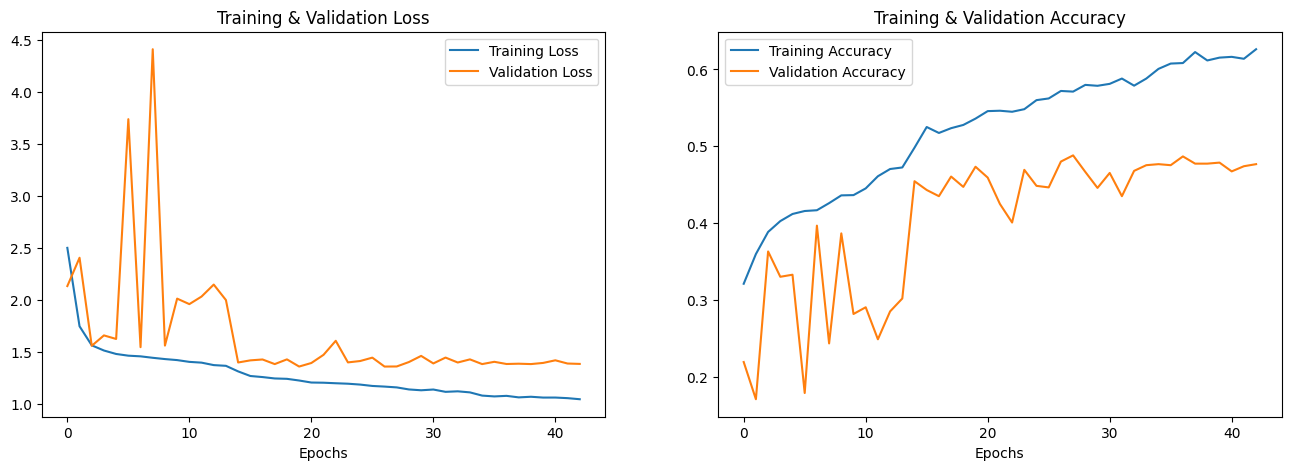

47/47 [==============================] - 11s 241ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       218
           1       0.53      0.35      0.42       254
           2       0.42      0.69      0.52       254
           3       0.58      0.71      0.64       254
           4       0.51      0.36      0.42       255
           5       0.35      0.28      0.32       254

    accuracy                           0.49      1489
   macro avg       0.49      0.49      0.48      1489
weighted avg       0.49      0.49      0.48      1489



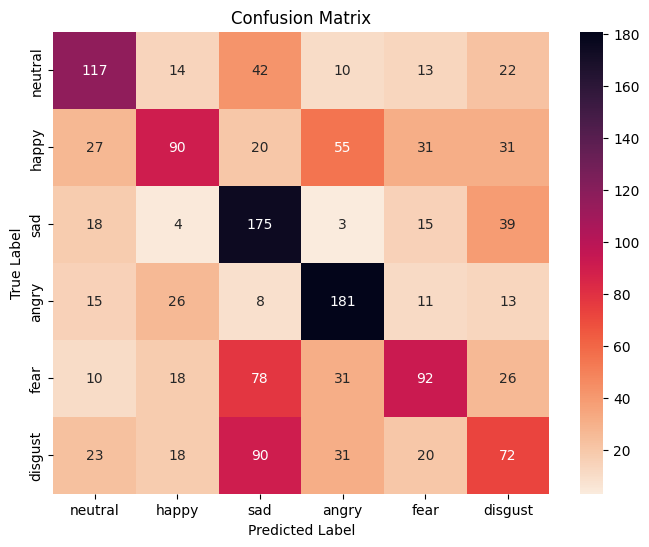

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot training/validation history
train_ac = history.history['accuracy']
train_loss = history.history['loss']
test_ac = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(test_loss, label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_ac, label='Training Accuracy')
ax[1].plot(test_ac, label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

plt.show()

# Ensure mel_test has the correct shape for the model
if mel_test.shape[-1] != 1:
    mel_test = np.expand_dims(mel_test, axis=-1)  # Add channel dimension if missing

# Predict using the trained model
y_pred = model.predict(mel_test)
y_pred_bool = np.argmax(y_pred, axis=1)
re = np.argmax(y_test, axis=1)  # Convert one-hot to labels

# Classification Report
print("Classification Report:")
print(classification_report(re, y_pred_bool, zero_division=0))

# Confusion Matrix
labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']  # Match your class_mapping order
matrix = confusion_matrix(re, y_pred_bool)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap='rocket_r', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Architecture diagram saved as architecture_diagram_with_colors.png


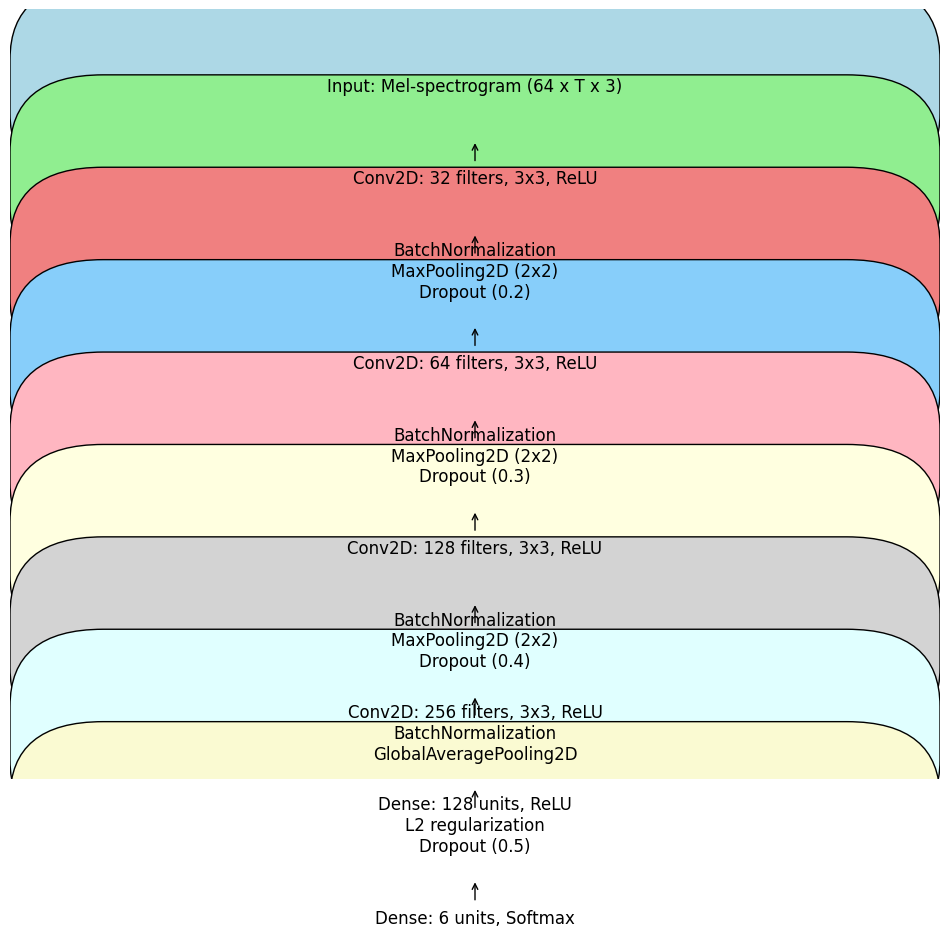

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the steps for each layer of the architecture
steps = [
    "Input: Mel-spectrogram (64 x T x 3)",
    "Conv2D: 32 filters, 3x3, ReLU",
    "BatchNormalization\nMaxPooling2D (2x2)\nDropout (0.2)",
    "Conv2D: 64 filters, 3x3, ReLU",
    "BatchNormalization\nMaxPooling2D (2x2)\nDropout (0.3)",
    "Conv2D: 128 filters, 3x3, ReLU",
    "BatchNormalization\nMaxPooling2D (2x2)\nDropout (0.4)",
    "Conv2D: 256 filters, 3x3, ReLU\nBatchNormalization\nGlobalAveragePooling2D",
    "Dense: 128 units, ReLU\nL2 regularization\nDropout (0.5)",
    "Dense: 6 units, Softmax"
]

# Colors for each step
colors = [
    "lightblue", "lightgreen", "lightcoral", "lightskyblue", "lightpink",
    "lightyellow", "lightgray", "lightcyan", "lightgoldenrodyellow", "lightsteelblue"
]

# Create a figure and axis for drawing
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('off')

# Function to draw the diagram with boxes and arrows
def draw_diagram():
    y_pos = 0.9
    box_height = 0.07
    box_width = 0.8

    # Draw the boxes and arrows
    for i, step in enumerate(steps):
        box = patches.FancyBboxPatch((0.1, y_pos - box_height / 2), box_width, box_height,
                                     boxstyle="round,pad=0.1", edgecolor="black", facecolor=colors[i])
        ax.add_patch(box)
        ax.text(0.5, y_pos, step, ha="center", va="center", fontsize=12, wrap=True)
        
        # Draw an arrow to the next box
        if i < len(steps) - 1:
            ax.annotate('', xy=(0.5, y_pos - box_height), xycoords='axes fraction',
                        xytext=(0.5, y_pos - 0.1), textcoords='axes fraction',
                        arrowprops=dict(arrowstyle="->", color='black'))
        y_pos -= 0.12  # Increase spacing between boxes

# Draw the complete diagram
draw_diagram()

# Save the diagram as an image
plt.savefig("architecture_diagram_with_colors.png", bbox_inches='tight', dpi=300)

print("Architecture diagram saved as architecture_diagram_with_colors.png")